# Bag of Words

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('train 2.csv')
print(df)

           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27475  4eac33d1c0   wish we could come see u on Denver  husband l...   
27476  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27477  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27478  ed167662a5                         But it was worth it  ****.   
27479  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral

In [15]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27480 entries, 0 to 27479
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [19]:
# Ne garder que les tweets positifs et négatifs
df_filtered = df[df['sentiment'].isin(['positive', 'negative'])]

# Calculer les pourcentages
sentiment_counts = df_filtered['sentiment'].value_counts()
sentiment_percentages = sentiment_counts / len(df_filtered) * 100

print("Pourcentage de tweets par sentiment :")
print(sentiment_percentages)


Pourcentage de tweets par sentiment :
sentiment
positive    52.447595
negative    47.552405
Name: count, dtype: float64


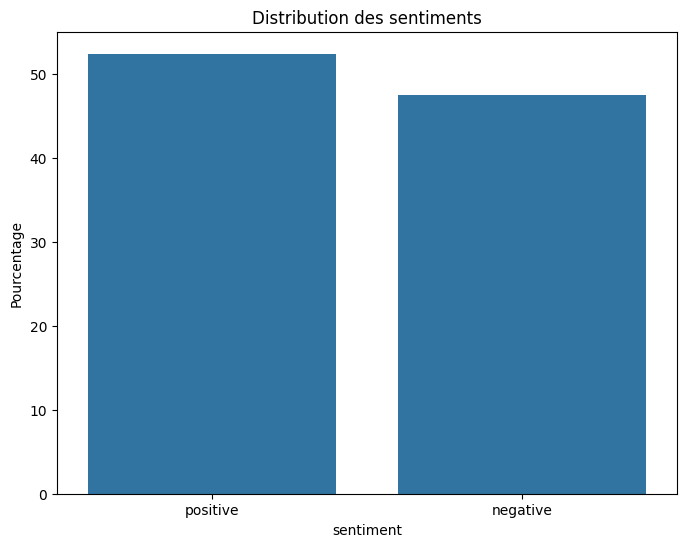

In [21]:
# Visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values)
plt.title('Distribution des sentiments')
plt.ylabel('Pourcentage')
plt.show()



In [23]:
# Préparation des données pour le modèle
X = df_filtered['text']
y = df_filtered['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=32)

In [25]:
# Création et entraînement du CountVectorizer
vectorizer = CountVectorizer()
X_train_CV = vectorizer.fit_transform(X_train)
X_test_CV = vectorizer.transform(X_test)

print("Dimensions de X_train_CV:", X_train_CV.shape)
print("Dimensions de X_test_CV:", X_test_CV.shape)
print("Nombre d'éléments stockés dans X_test_CV:", X_test_CV.nnz)

Dimensions de X_train_CV: (12272, 15806)
Dimensions de X_test_CV: (4091, 15806)
Nombre d'éléments stockés dans X_test_CV: 44633


In [27]:
# Entraînement de la régression logistique
model = LogisticRegression(random_state=32)
model.fit(X_train_CV, y_train)

# Évaluation du modèle
train_score = model.score(X_train_CV, y_train)
test_score = model.score(X_test_CV, y_test)

print(f"Score sur l'ensemble d'entraînement: {train_score:.3f}")
print(f"Score sur l'ensemble de test: {test_score:.3f}")


Score sur l'ensemble d'entraînement: 0.966
Score sur l'ensemble de test: 0.877
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Prédictions
y_pred = model.predict(X_test_CV)

# Trouver les tweets mal prédits
misclassified = X_test[y_test != y_pred]
true_labels = y_test[y_test != y_pred]
predicted_labels = y_pred[y_test != y_pred]

print("\n10 tweets mal classifiés :")
for i, (tweet, true_label, pred_label) in enumerate(zip(misclassified[:10], true_labels[:10], predicted_labels[:10])):
    print(f"\nTweet {i+1}:")
    print(f"Texte: {tweet}")
    print(f"Vrai sentiment: {true_label}")
    print(f"Sentiment prédit: {pred_label}")


10 tweets mal classifiés :

Tweet 1:
Texte: HollowbabesHere comes the utter shite #bgt <I completely agree
Vrai sentiment: negative
Sentiment prédit: positive

Tweet 2:
Texte:  SUFFICATION NO BREATHING. It`s okay. There`ll be more. You`re invited to mine, but I can`t promise fun times.  *Jinx
Vrai sentiment: negative
Sentiment prédit: positive

Tweet 3:
Texte: i wanna vote for Miley Cyrus for the mtv movie awards..but i don`t know where i could  somebody could send me a link? thaank you <3
Vrai sentiment: positive
Sentiment prédit: negative

Tweet 4:
Texte: I love music so much that i`ve gone through pain to play :S my sides of my fingers now are peeling and have blisters from playing so much
Vrai sentiment: negative
Sentiment prédit: positive

Tweet 5:
Texte: I can only message those who message me, if we`re fwends...so those that want replies..follow me.  hmm..that sounds funny..
Vrai sentiment: positive
Sentiment prédit: negative

Tweet 6:
Texte: wish I could feel no pain (8)  but 

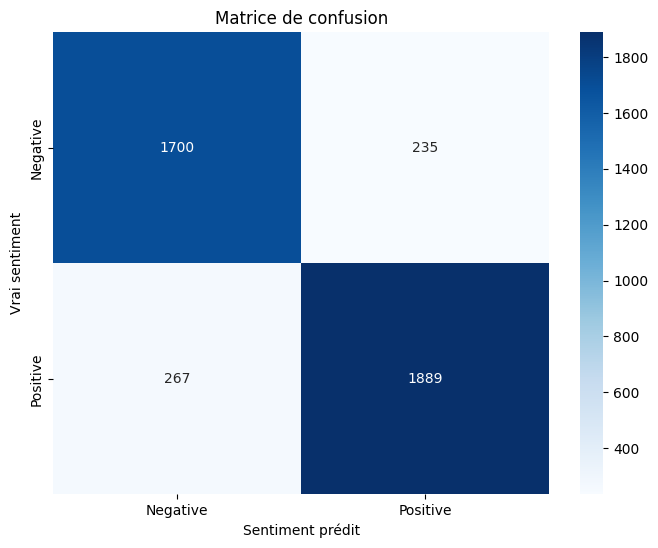

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Matrice de confusion')
plt.ylabel('Vrai sentiment')
plt.xlabel('Sentiment prédit')
plt.show()

Précision du modèle de classification des sentiments est de 96.6% sur l'ensemble d'entraînement et 87.7% sur l'ensemble de test. La distribution des sentiments dans le dataset est assez équilibrée avec environ 52.4% de tweets positifs et 47.6% de tweets négatifs.

En examinant les tweets mal classifiés, on peut voir que certains cas sont effectivement difficiles à classifier, même pour un humain. Par exemple, certains tweets contiennent de l'ironie ou du sarcasme qui peut être mal interprété par le modèle. De plus, certains tweets contiennent des émotions mixtes ou sont ambigus dans leur formulation.